# Preprocessing and sampling

The aim of this code is to create the train and test data sample:
* Create a Low resolution picture
* Save it as numpy array
* Create a test and train sample

In [23]:
#Dependancies
import os
from glob import glob
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as Image
from math import floor
from random import shuffle, uniform
from numpy.random import randint

In [6]:
#Select the picture with the good pattern
pathRoot = "D:/Project/DeepLearning/denoisedZoomPicture/Data/"
path = pathRoot + "original/*.jpg"
pics = glob(path)

## Create array from the pictures

Loop through the pictures in the  data path:
* Resize the picture in order to maintain widht height ratio. The new picture's size (nSize, height) or (width,nSize) depending on $\min(higth , width)$
* Crop the center of the picture
* Create a copy of lower dimensions
* Increase the size of this copy in order to put it back to the original size
* Save it as numpy array

In [3]:
redCoef = 3
nSize = 200

In [4]:
redCoef = int(np.floor(nSize / redCoef))

for p in pics:

    picName = p.split('\\')[1].split('.')[0]
    img = Image.open(p)
    
    h = img.height
    w = img.width

    #resize the picture with original ratio
    if h <= w:
        img = img.resize(( floor( nSize * w / h ), nSize  ), Image.ANTIALIAS)
    else:
        img = img.resize((nSize,  floor(nSize *  h / w) ), Image.ANTIALIAS)
    
    #Crop the picture; keep the center of the picture         

    left = (img.width - nSize)/2
    top = (img.height - nSize)/2
    right = (img.width + nSize)/2
    bottom = (img.height + nSize)/2
    
    #This one is the 200x200
    img = img.crop((left, top, right, bottom))
    
    #img.save(pathRoot + "Y/{}.png".format(picName))

    img2 = img.resize((redCoef,redCoef),resample=Image.BILINEAR)
    img2 = img2.resize((nSize,nSize),Image.NEAREST)
    
    
    img = np.asarray(img)
    np.save(pathRoot + "Y/" + picName ,img)
    img2 = np.asarray(img2)
    np.save(pathRoot + "X/" + picName ,img2)
    #img2.save(pathRoot + "X/{}.png".format(picName))


## Create test and train sample

Create 2 text files on the disc listing the content of the train and test file

In [5]:

testTrainSplit = 0.8
pics = os.listdir(pathRoot + "X/")
shuffle(pics)#Shuffle the pictures

train = pics[0: floor(testTrainSplit * len(pics))  ]
test = pics[floor(testTrainSplit * len(pics)):  ]  
file = open(pathRoot + 'test.txt','a')
for j in test:
    file.write( j + '\n')
file.close()
file = open(pathRoot + 'train.txt','a')
for j in train:
    file.write( j + '\n')
file.close()

### Result

In [27]:
#View the picture
def viewPics(Xpath,Ypath):
    """this function show both X and Y picture"""
    pics = os.listdir(Xpath)    
    i = randint(0,len(pics))
    x = np.load(Xpath + pics[i])
    y = np.load(Ypath + pics[i])
    x = x.astype('uint8')
    y = y.astype('uint8')
    mtr = np.concatenate([x,y], axis=1)
    img = Image.fromarray(mtr)
    return(img)

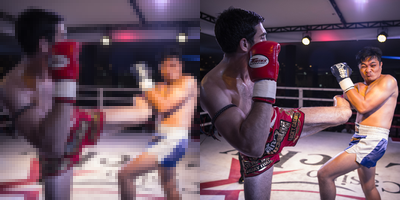

In [21]:
viewPics(pathRoot + "X/",pathRoot + "Y/")

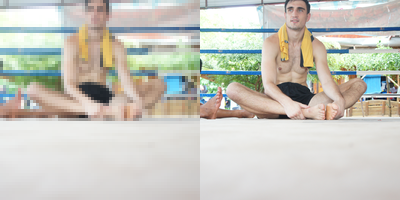

In [16]:
viewPics(pathRoot + "X/",pathRoot + "Y/")

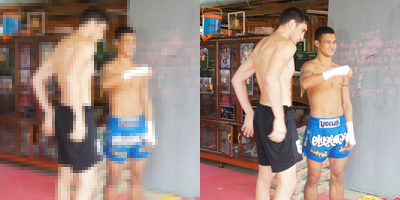

In [20]:
viewPics(pathRoot + "X/",pathRoot + "Y/")

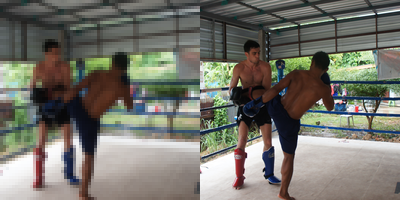

In [68]:
viewPics(pathRoot + "X/",pathRoot + "Y/")